# Computer Vision Nanodegree

## Project: Image Captioning

---

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](images/coco-examples.jpg)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, you will explore this dataset, in preparation for the project.

## Step 1: Initialize the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that you will use to obtain the data.

In [2]:
import os
import sys
data_dir_root = "./data/cocoapi"
# sys.path.append(f'{data_dir_root}/cocoapi/PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = f'{data_dir_root}/'
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=6.35s)
creating index...
index created!
loading annotations into memory...
Done (t=0.34s)
creating index...
index created!


In [3]:
print(type(ids))
print(ids[:10])

<class 'list'>
[156, 509, 603, 918, 1072, 1727, 1728, 1767, 1768, 1769]


## Step 2: Plot a Sample Image

Next, we plot a random image from the dataset, along with its five corresponding captions.  Each time you run the code cell below, a different image is selected.  

In the project, you will use this dataset to train your own model to generate captions from images!

http://images.cocodataset.org/val2014/COCO_val2014_000000222831.jpg


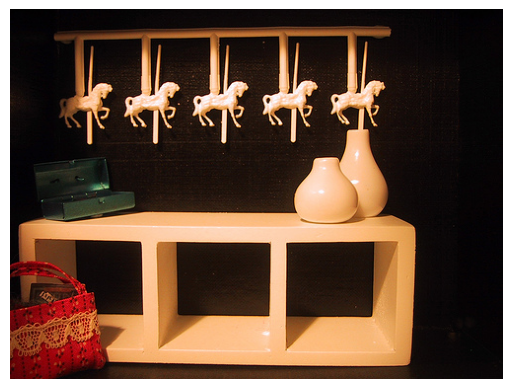

The objects are placed carefully for a special effect on the viewer.
An assortment of thrift store objects, including two vases and some miniature carousel horses.
a small shelf with two vases and a tool box on top
Wooden carousel horses displayed above shelving unit display.
A group of wooden horses on a rod.


In [6]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id'])
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

In [29]:
image_id = coco.anns[ids[len(ids)-1]]["image_id"]
img = coco.loadImgs(image_id)[0]
annIds = coco_caps.getAnnIds(imgIds=img['id'])
anns = coco_caps.loadAnns(annIds)
anns

[{'image_id': 46847,
  'id': 564929,
  'caption': 'a number of birds on a beach near the water '},
 {'image_id': 46847,
  'id': 565550,
  'caption': 'A flock birds sitting on top of a sandy beach.'},
 {'image_id': 46847,
  'id': 568928,
  'caption': 'Seagulls flying down to rock covered beach '},
 {'image_id': 46847,
  'id': 569066,
  'caption': 'A rocky beach area with seagulls swooping down and some standing on the ground.'},
 {'image_id': 46847,
  'id': 569852,
  'caption': 'Seagulls flock to feed on a rocky, clay-colored beach. '}]

In [30]:
# Retrieve all captions
captions = []
for ann_id in ids:
    img_id = coco.anns[ann_id]['image_id']
    img = coco.loadImgs(img_id)[0]
    annIds = coco_caps.getAnnIds(imgIds=img['id'])
    anns = coco_caps.loadAnns(annIds)
    for ann in anns:
        captions.append(ann["caption"])

# Find the longest caption
longest_caption = max(captions, key=lambda x: len(x.split()))
print(f'Longest caption: "{longest_caption}"')
print(f'Number of words: {len(longest_caption.split())}')

Longest caption: "A large square concrete wall, which shows people over the rim, has inside of it a pinkish cloud of dust and a fallen bull as well as two horses, the closest of which is trotting forward with a man in western gear , who is looking back at the bull."
Number of words: 50


In [31]:
len(captions)

1460378

In [32]:
captions

['Tray of food disguised in car, on restaurant counter',
 'A plate that has a cardboard car holding a hot dog and fries in it.',
 'some food is sticking out of a toy car',
 'A green surface with  a fifties car model on a plate, topped with a hotdog roll and fries, a napkin dispenser, menus and condiments, has  two sets of  hands on either side, reaching for items, one of which is part of a black and  red/wearing woman. ',
 'A meal of a hot dog and fries served out of a plate that looks like a muscle car.',
 'A plate with two hot dogs and a cup of coke on a table next to a bike.',
 'Two hotdogs with mustard on a plate with a soft drink sitting on a table with a bike nearby.',
 'Two hot dogs sit on a white paper plate near a soda cup which are sitting on a green picnic table while a bike and a silver car are parked nearby.',
 'A picture of two hot dogs and a cup of soda',
 'Table near car with a bicycle along side and a plate with two hot dogs and a coke.',
 'A plate with two hot dogs an

## Step 3: What's to Come!

In this project, you will use the dataset of image-caption pairs to train a CNN-RNN model to automatically generate images from captions.  You'll learn more about how to design the architecture in the next notebook in the sequence (**1_Preliminaries.ipynb**).

![Image Captioning CNN-RNN model](images/encoder-decoder.png)